In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Research Question
For now, our goal is to investigate recidivism rate in 2012 among available Indian states. There are many more variables than observations, so we'll try to zero in on key variables through this data visualization notebook. Firstly, since the vast majority of convicts are male, I drop female-specific covariates. 

In [29]:
prison_df = pd.read_csv("Data/tidy_df.csv")
prison_2012 = prison_df.query("year==2012")
#prison_2012.filter(regex="^.*Male",axis=1)
prison_2012.filter(regex=r"^.*\b(?<!Female)$",axis=1)

,state_name,year,convicts_admitted,habitual_offenders,recidiv_ratio,CST-prop-OBC-Male,CST-prop-Others-Male,CST-prop-SC-Male,CST-prop-ST-Male,SP-prop-1 Less than 2 years-Female-age_16_18_years,...,adult_education,higher_education,computer_course,inmates_trained,financial_assistance_provided,rehabilitated,legal_aid_provided,incidence,injured,killed
11,Andhra Pradesh,2012,9700,1328,0.136907,0.241423,0.414019,0.189750,0.094452,0.0,...,19539,514,154,1993.0,79,31,2402,0,0,0
14,Arunachal Pradesh,2012,9,0,0.000000,0.000000,0.250000,0.000000,0.750000,0.0,...,0,0,0,7.0,0,0,6,0,0,0
26,Assam,2012,2152,126,0.058550,0.260252,0.361199,0.196215,0.148265,0.0,...,1423,51,22,267.0,196,99,22,0,0,0
38,Bihar,2012,8013,69,0.008611,0.495618,0.297712,0.136319,0.045521,0.0,...,2871,12,616,1878.0,76,1,563,9,17,0
39,Chhattisgarh,2012,3559,62,0.017421,0.333836,0.112341,0.211100,0.301811,0.0,...,839,239,92,1040.0,5,0,1261,0,0,0
62,Goa,2012,135,4,0.029630,0.117647,0.735294,0.051471,0.066176,0.0,...,0,6,46,117.0,7,34,241,0,0,0
74,Gujarat,2012,6885,0,0.000000,0.301145,0.279138,0.165731,0.212666,0.0,...,2082,1348,665,5737.0,86,114,3370,0,0,0
84,Haryana,2012,4383,102,0.023272,0.223996,0.443367,0.251604,0.037756,0.0,...,605,655,103,602.0,0,224,1747,14,15,0
96,Himachal Pradesh,2012,615,0,0.000000,0.081933,0.534664,0.303571,0.042017,0.0,...,42,22,0,124.0,0,3,332,0,0,0
108,Jammu & Kashmir,2012,451,1,0.002217,0.056555,0.694087,0.151671,0.064267,0.0,...,182,61,60,517.0,0,108,201,1,1,0


In [30]:
prison_2012.filter(regex=r"^.*(?<!Female).*$",axis=1)
M2012=prison_2012.loc[:,prison_2012.columns.str.contains("Female")==False]

## Recidivism Rates
By plotting number of convicted prisoners and recidivism rates by state, we can see that
- more populous states tend to have more convicts
* Karnataka appears to have a fairly high number of convicts (2nd highest though 8th most populous)
- smaller states/ states with fewer convicts tend to higher recidivism rates
* Andhra Pradesh, Kerala, and West Bengal have fairly high recividism rates for their number of convicts

Kerala is one of the most urbanized and educated areas in India. Andhra Pradesh has a predominantly agricultural economy, and Karnataka has a large agricultural as well as an IT industry. West Bengal suffers from undeveloped infrastructure and occasional unrest. It is not easy to posit what factors affect recidivism rate, or what the rate means. For example, we are missing information on how stringent or effective policing is. A high recidivism rate may reflect a true higher propensity for recidivism, judiciary corruption, or a more thorough law enforcement. Although fitting models may give us inferential and predictive insight into recidivism rate and number of convicted prisoners, we'll have to be careful when interpreting and extrapolating these results.

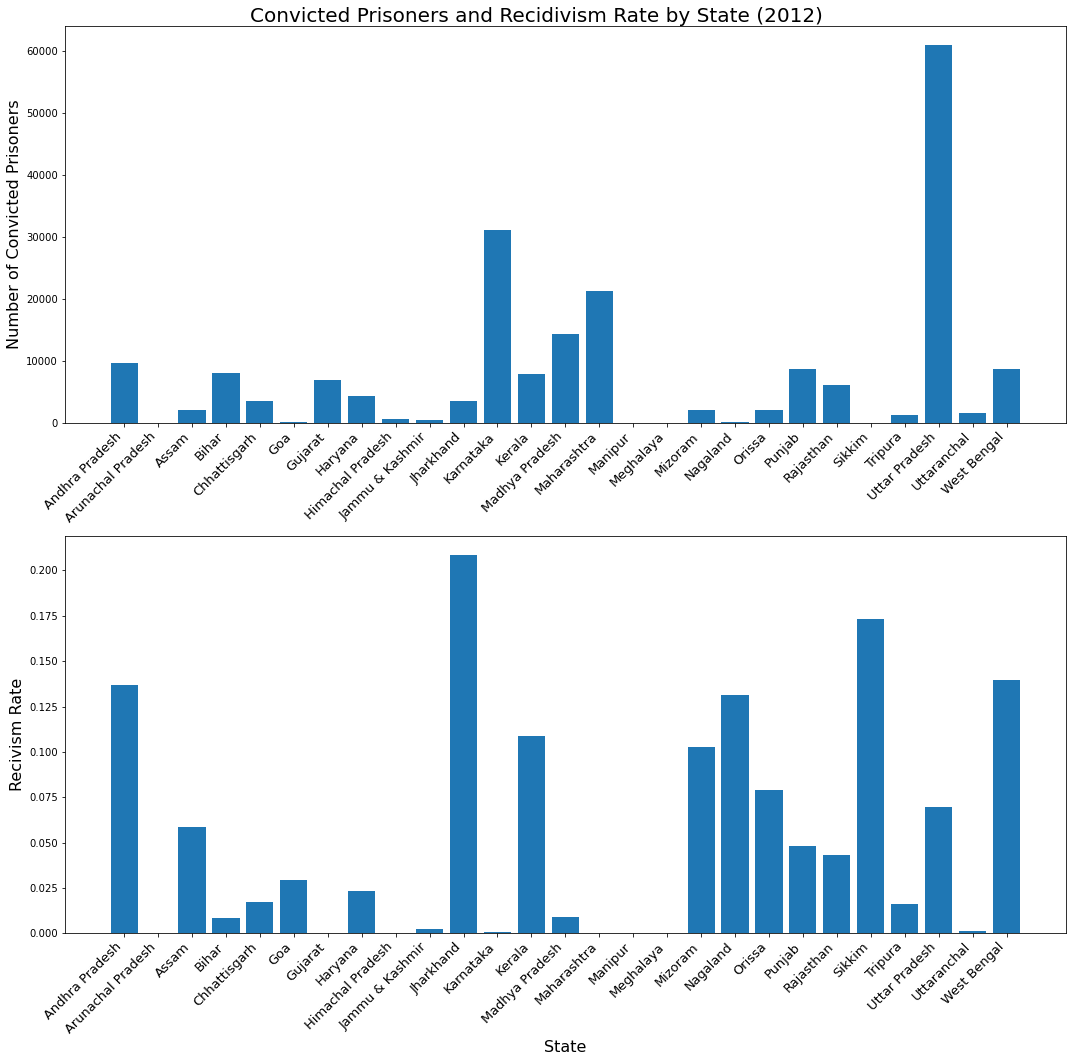

In [31]:


figure, ax = plt.subplots(2,1,figsize=(15,15))

figure.suptitle("Convicted Prisoners and Recidivism Rate by State (2012)", size=20)
ax[0].bar(prison_2012["state_name"],prison_2012["convicts_admitted"])
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(prison_2012["state_name"], rotation=45, size=13, ha='right')
ax[0].set_ylabel("Number of Convicted Prisoners", size=16)

ax[1].bar(prison_2012["state_name"],prison_2012["recidiv_ratio"])
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(prison_2012["state_name"], rotation=45, size=13, ha='right')
ax[1].set_xlabel("State", size=16)
ax[1].set_ylabel("Recivism Rate", size=16)

figure.tight_layout()


## Education, Caste, and Religion
Rural area convicts tend to be lower-caste and poorer-educated; this seems to encompass areas which have a large Christian convict population. These areas also have fewer total convicts due to lower population density; as a result, it may be easier to track prisoners, resulting in a higher recidivism rate. I hypothesize that a diverse population of convicts makes it more difficult to rehabilitate them; diversity occurs in cities and there may be a lack of governmental and familial support for individual convicts there. 

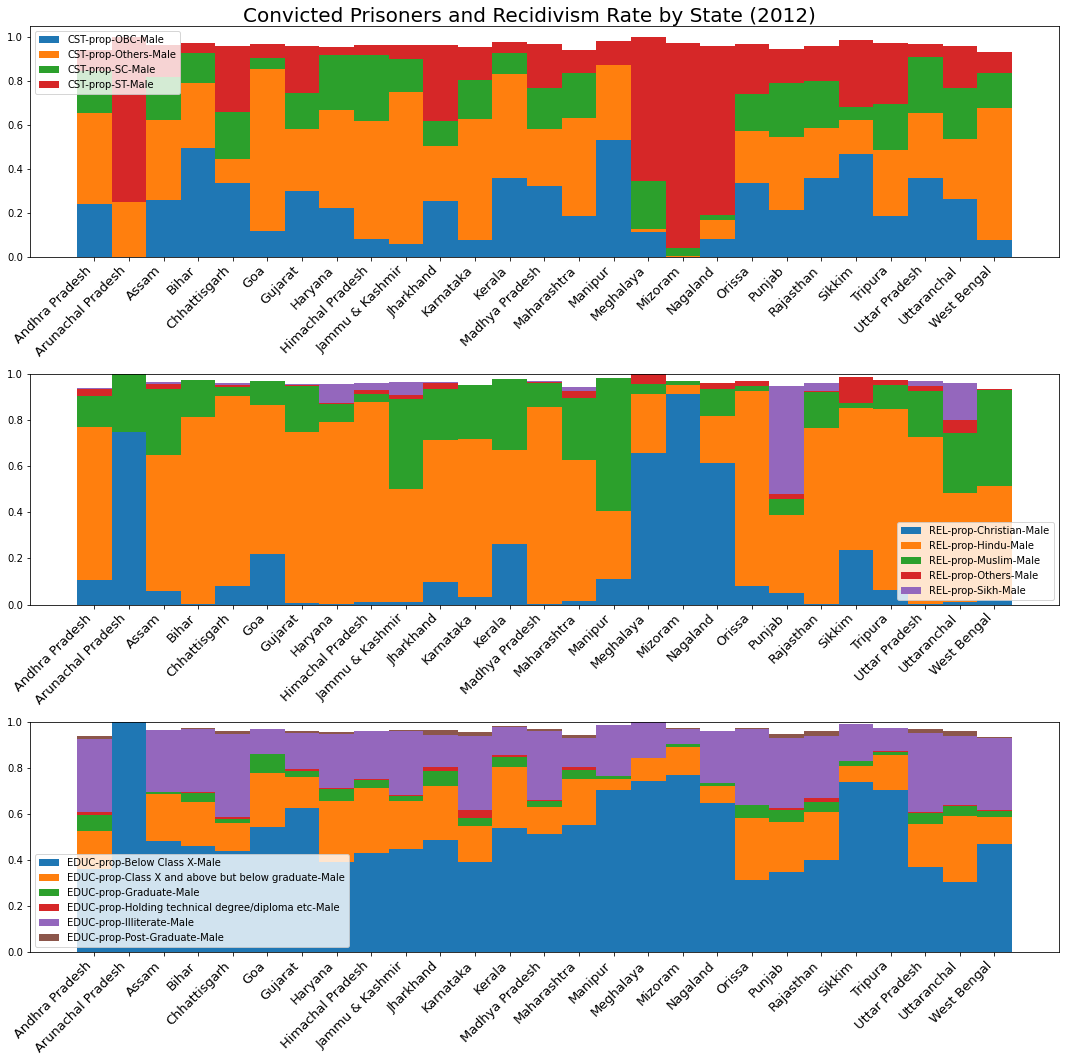

In [32]:
M2012_CST_REL=M2012.filter(regex=r"^.*(CST|REL|EDUC|IPC|state_name).*$")

width=1
plt.rcParams['figure.figsize'] = [16, 10]

figure, ax = plt.subplots(3,1,figsize=(15,15))

figure.suptitle("Convicted Prisoners and Recidivism Rate by State (2012)", size=20)
bottom1 = np.zeros(len(M2012))
bottom2 = np.zeros(len(M2012))
bottom3 = np.zeros(len(M2012))

# Plot each layer of the bar, adding each bar to the "bottom" so
# the next bar starts higher.
for i, col in enumerate(M2012_CST_REL.filter(regex=r"^.*CST.*$").columns):
    ax[0].bar(M2012_CST_REL["state_name"], M2012_CST_REL[col], width=width,bottom=bottom1, label=col)
    bottom1 += np.array(M2012_CST_REL[col])

for i, col in enumerate(M2012_CST_REL.filter(regex=r"^.*REL.*$").columns):
    ax[1].bar(M2012_CST_REL["state_name"], M2012_CST_REL[col], width=width,bottom=bottom2, label=col)
    bottom2 += np.array(M2012_CST_REL[col])
    
for i, col in enumerate(M2012_CST_REL.filter(regex=r"^.*EDUC.*$").columns):
    ax[2].bar(M2012_CST_REL["state_name"], M2012_CST_REL[col], width=width,bottom=bottom3, label=col)
    bottom3 += np.array(M2012_CST_REL[col])
    
    
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(M2012_CST_REL["state_name"],rotation=45, size=13, ha='right')
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(M2012_CST_REL["state_name"],rotation=45, size=13, ha='right')
ax[2].set_xticks(ax[2].get_xticks())
ax[2].set_xticklabels(M2012_CST_REL["state_name"],rotation=45, size=13, ha='right')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.tight_layout()

## IPC Crimes
It appears that the four states of interest from before (Andhra Pradesh, Kamataka, Kerala, and West Bengal) have lower proportions of convicted sexual crimes than other states. This may due to an actual lower sexual crime rate, underreporting, or a tendency to not convict sex crimes in these states. Most crimes are committed by 30-50 year old men, but in Kamataka, violent convicted crimes are just as driven by younger 18-30 year old men.

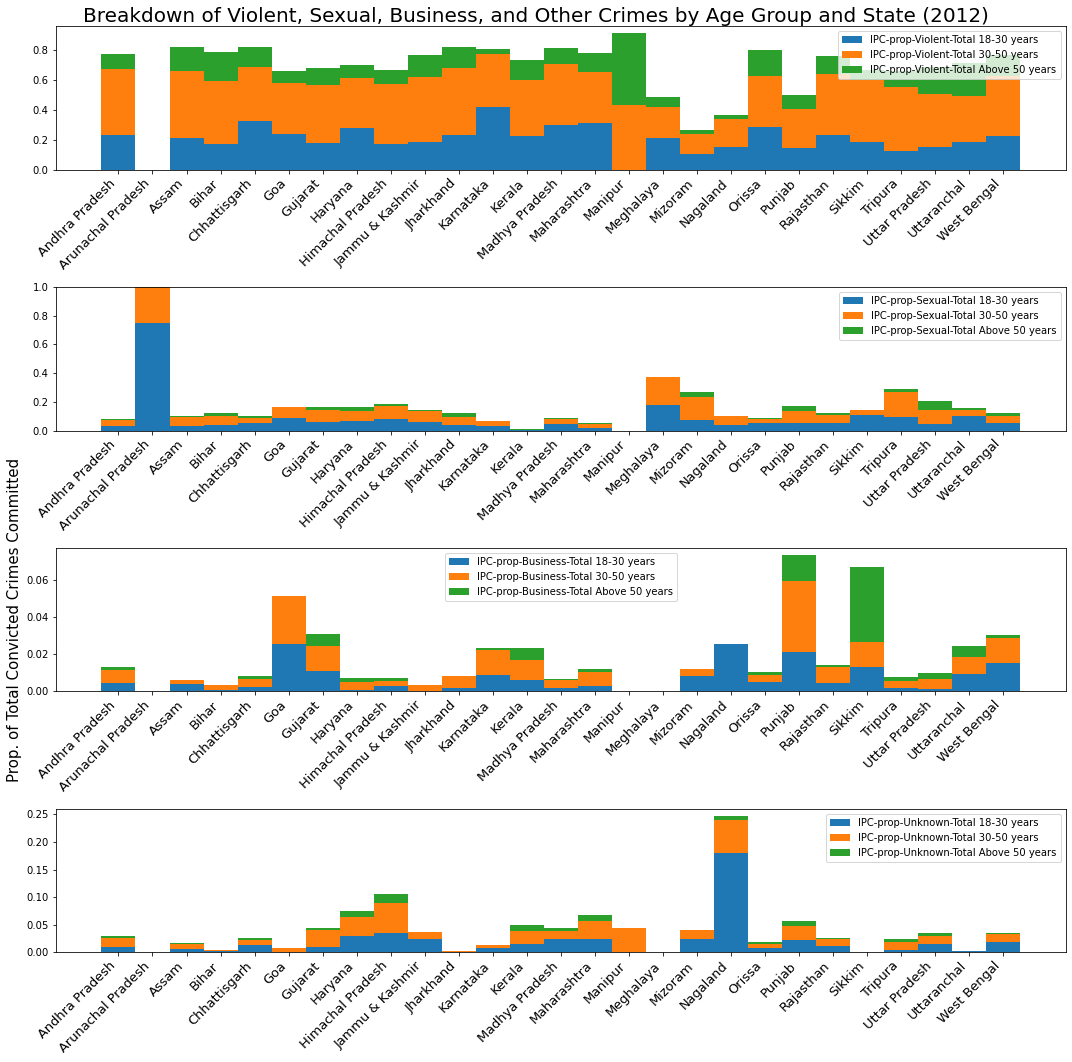

In [33]:
M2012_IPC = M2012.filter(regex=r"^(IPC|state_name).*(?<!-Total)$"). \
filter(M2012.loc[:,M2012.columns.str.contains("16-18")==False])

bottom1 = np.zeros(len(M2012))
bottom2 = np.zeros(len(M2012))
bottom3 = np.zeros(len(M2012))
bottom4 = np.zeros(len(M2012))

figure, ax = plt.subplots(4,1,figsize=(15,15))

figure.suptitle("Breakdown of Violent, Sexual, Business, and Other Crimes by Age Group and State (2012)", size=20)

for i, col in enumerate(M2012_IPC.filter(regex=r"^.*Violent.*$").columns):
    ax[0].bar(M2012_IPC["state_name"], M2012_IPC[col], width=width,bottom=bottom1, label=col)
    bottom1 += np.array(M2012_IPC[col])
    
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(M2012_IPC["state_name"],rotation=45, size=13, ha='right')
ax[0].legend()

for i, col in enumerate(M2012_IPC.filter(regex=r"^.*Sexual.*$").columns):
    ax[1].bar(M2012_IPC["state_name"], M2012_IPC[col], width=width,bottom=bottom2, label=col)
    bottom2 += np.array(M2012_IPC[col])
    

ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(M2012_IPC["state_name"],rotation=45, size=13, ha='right')
ax[1].legend()

for i, col in enumerate(M2012_IPC.filter(regex=r"^.*Business.*$").columns):
    ax[2].bar(M2012_IPC["state_name"], M2012_IPC[col], width=width,bottom=bottom3, label=col)
    bottom3 += np.array(M2012_IPC[col])
    

ax[2].set_xticks(ax[2].get_xticks())
ax[2].set_xticklabels(M2012_IPC["state_name"],rotation=45, size=13, ha='right')
ax[2].legend()
ax[2].set_ylabel("Prop. of Total Convicted Crimes Committed", size=15)

for i, col in enumerate(M2012_IPC.filter(regex=r"^.*Unknown.*$").columns):
    ax[3].bar(M2012_IPC["state_name"], M2012_IPC[col], width=width,bottom=bottom4, label=col)
    bottom4 += np.array(M2012_IPC[col])
    

ax[3].set_xticks(ax[3].get_xticks())
ax[3].set_xticklabels(M2012_IPC["state_name"],rotation=45, size=13, ha='right')
ax[3].legend()


plt.tight_layout()

## Jail Types
Many rural states have predominantly smaller district jails or central jails. Kamataka has the largest proportion of open jails among the states.

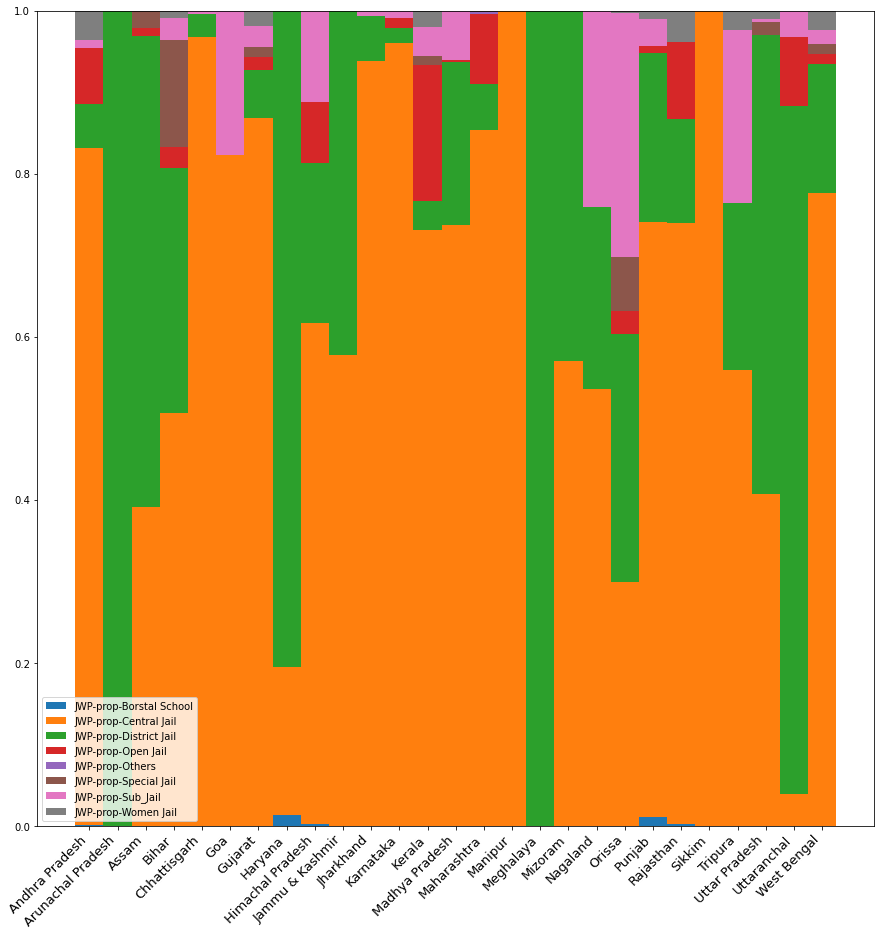

In [34]:
M2012_JWP=M2012.filter(regex=r"^(JWP|state_name).*$")

figure, ax = plt.subplots(figsize=(15,15))
bottom = np.zeros(len(M2012))

for i, col in enumerate(M2012_JWP.filter(regex=r"^JWP.*$").columns):
    ax.bar(M2012_JWP["state_name"], M2012_JWP[col], width=width,bottom=bottom, label=col)
    bottom += np.array(M2012_JWP[col])
    
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(M2012_JWP["state_name"],rotation=45, size=13, ha='right')
ax.legend()

In [41]:
#  Returns tuple of handles, labels for axis ax, after reordering them to conform to the label order `order`, and if unique is True, after removing entries with duplicate labels.
def reorderLegend(ax=None,order=None,unique=False):
    if ax is None: ax=plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0])) # sort both labels and handles by labels
    if order is not None: # Sort according to a given list (not necessarily complete)
        keys=dict(zip(order,range(len(order))))
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t,keys=keys: keys.get(t[0],np.inf)))
    if unique:  labels, handles= zip(*unique_everseen(zip(labels,handles), key = labels)) # Keep only the first of each handle
    ax.legend(handles, labels)
    return(handles, labels)
def unique_everseen(seq, key=None):
    seen = set()
    seen_add = seen.add
    return [x for x,k in zip(seq,key) if not (k in seen or seen_add(k))]

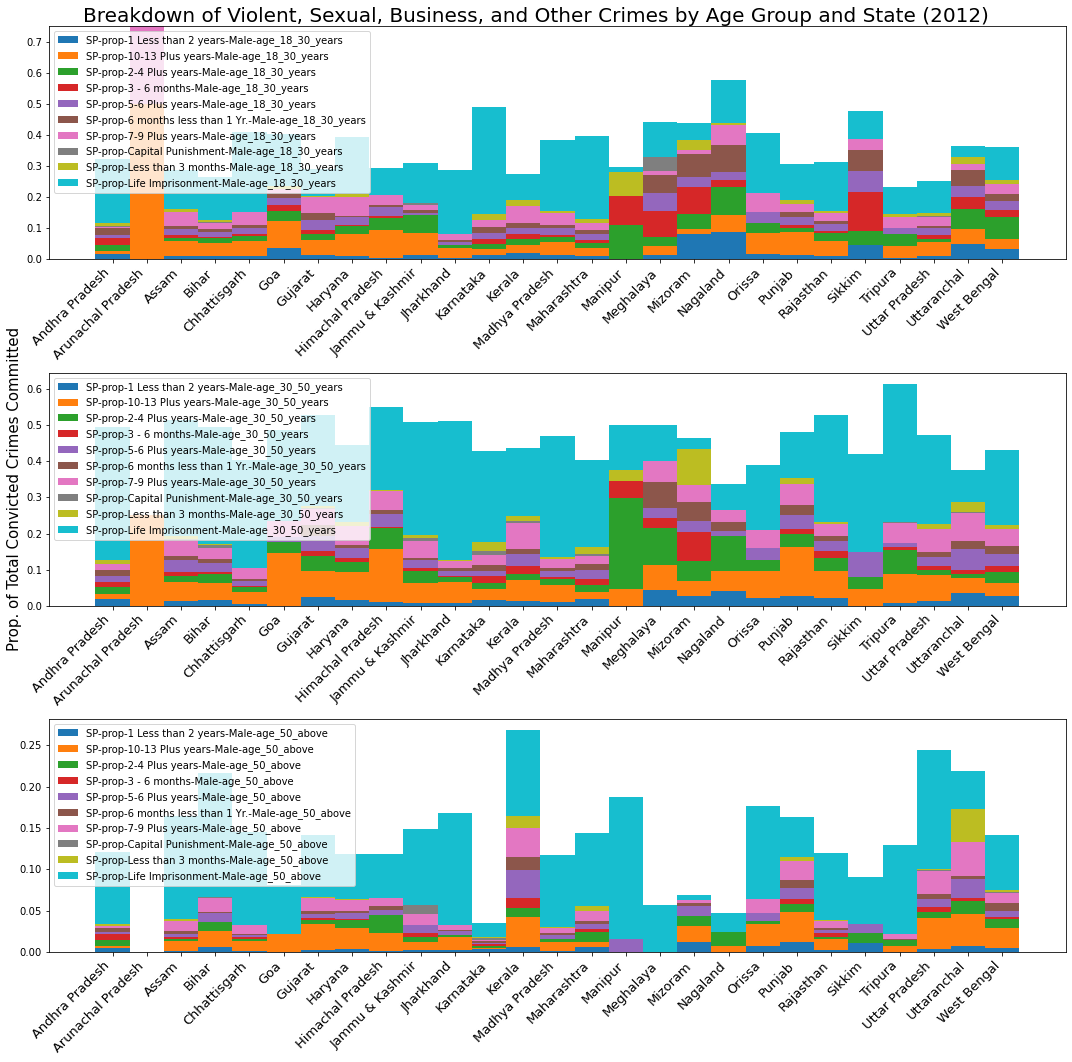

In [42]:
M2012_SP = M2012.filter(regex=r"^(SP|state_name).*$"). \
filter(M2012.loc[:,M2012.columns.str.contains("16_18")==False])

bottom1 = np.zeros(len(M2012))
bottom2 = np.zeros(len(M2012))
bottom3 = np.zeros(len(M2012))
bottom4 = np.zeros(len(M2012))

figure, ax = plt.subplots(3,1,figsize=(15,15))

figure.suptitle("Breakdown of Violent, Sexual, Business, and Other Crimes by Age Group and State (2012)", size=20)


for i, col in enumerate(M2012_SP.filter(regex=r"^.*age_18_30_years$").columns):
    ax[0].bar(M2012_IPC["state_name"], M2012_SP[col], width=width,bottom=bottom2, label=col)
    bottom2 += np.array(M2012_SP[col])
    

ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(M2012_SP["state_name"],rotation=45, size=13, ha='right')
ax[0].legend()

for i, col in enumerate(M2012_SP.filter(regex=r"^.*age_30_50_years$").columns):
    ax[1].bar(M2012_SP["state_name"], M2012_SP[col], width=width,bottom=bottom3, label=col)
    bottom3 += np.array(M2012_SP[col])
    

ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(M2012_SP["state_name"],rotation=45, size=13, ha='right')
ax[1].legend()
ax[1].set_ylabel("Prop. of Total Convicted Crimes Committed", size=15)

for i, col in enumerate(M2012_SP.filter(regex=r"^.*age_50_above$").columns):
    ax[2].bar(M2012_SP["state_name"], M2012_SP[col], width=width,bottom=bottom4, label=col)
    bottom4 += np.array(M2012_SP[col])
    

ax[2].set_xticks(ax[2].get_xticks())
ax[2].set_xticklabels(M2012_SP["state_name"],rotation=45, size=13, ha='right')
reorderLegend(ax[2],['SP-prop-Less than 3 months-Male-age_50_above', 
                     'SP-prop-3 - 6 months-Male-age_50_above',
                    'SP-prop-6 months less than 1 Yr.-Male-age_50_above',
                    'SP-prop-1 Less than 2 years-Male-age_50_above',
                    'SP-prop-2-4 Plus years-Male-age_50_above',
                    'SP-prop-5-6 Plus years-Male-age_50_above',
                    'SP-prop-7-9 Plus years-Male-age_50_above',
                    'SP-prop-10-13 Plus years-Male-age_50_above',
                    'SP-prop-Life Imprisonment-Male-age_50_above',
                    'SP-prop-Capital Punishment-Male-age_50_above'])
ax[2].legend()


plt.tight_layout()